In [3]:
#works with json 0.9.5, pandas 1.5.3, numpy 1.24.3, matplotlib 3.6.2, sci-kit learn 1.2.2, scipy 1.10.1, keras 2.13.1 and tensorflow 2.13.0     
import json
from pprint import pprint
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster

from sklearn.decomposition import PCA
from sklearn.neighbors import DistanceMetric
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics import pairwise_distances

# additional set up
%matplotlib inline
np.set_printoptions(precision=5, suppress=True) # suppress scientific float notation

with open('data_file_20181203.json') as f:
    data = json.load(f)

In [4]:
# create data frame
df = {'Name': np.zeros(len(data['quantlets'])),
      'author_of_last_comm': np.zeros(len(data['quantlets'])),
      'is_debuggable': np.zeros(len(data['quantlets'])),
      'grade': np.zeros(len(data['quantlets'])),
      'keywords': np.zeros(len(data['quantlets']))}

df = pd.DataFrame(data=df)

In [5]:
# extract the columns we need
counter=0
for c, i in enumerate(data['quantlets']):
    print(i)
    df.loc[c,'Name'] = i
    df.loc[c,'author_of_first_comm'] = data['quantlets'][i]['commit_first']['commit']['author']['name']
    df.loc[c,'author_of_last_comm'] = data['quantlets'][i]['commit_last']['commit']['author']['name']
    df.loc[c,'is_debuggable'] = data['quantlets'][i]['is_debuggable']
    try:
        df.loc[c,'grade'] = data['quantlets'][i]['grade']
        df.loc[c,'keywords'] = ' '.join(str(e) for e in set(data['quantlets'][i]['keyword_list']))
    except:
        df.loc[c,'grade'] = 'did not work'
        df.loc[c,'keywords'] ='did not work'
        counter+=1
print(f'Could not load {counter} quantlets.')
df = df[df['is_debuggable']==True]

ADM/HermPolyPlot/Metainfo.txt
ARR/ARRboxage/Metainfo.txt
ARR/ARRboxgscit/Metainfo.txt
ARR/ARRboxhb/Metainfo.txt
ARR/ARRcormer/Metainfo.txt
ARR/ARRdenmer2d/Metainfo.txt
ARR/ARRdenmer3d/Metainfo.txt
ARR/ARRhexage/Metainfo.txt
ARR/ARRhexcit/Metainfo.txt
ARR/ARRhexhin/Metainfo.txt
ARR/ARRhismer/Metainfo.txt
ARR/ARRmosage/Metainfo.txt
ARR/ARRmosagegr/Metainfo.txt
ARR/ARRmossub/Metainfo.txt
ARR/ARRpcpgscit/Metainfo.txt
ARR/ARRpcphb/Metainfo.txt
ARR/ARRpcpmer/Metainfo.txt
ARR/ARRpcprp/Metainfo.txt
ARR/ARRqrqqhb/Metainfo.txt
ARR/ARRscaage/Metainfo.txt
ARR/ARRscamer/Metainfo.txt
Adaptive_Penalized_Macro_Factors/Metainfo.txt
BCS-1/BCS_Kernel_nhTemp/Metainfo.txt
BCS-1/BCS_MLRleaps/Metainfo.txt
BCS-1/BCS_RANDU/Metainfo.txt
BCS/BCS_ARM/MetaInfo.txt
BCS/BCS_ArchimedeanContour/MetaInfo.txt
BCS/BCS_BarGraphs/MetaInfo.txt
BCS/BCS_Bincdf/MetaInfo.txt
BCS/BCS_Binhist/MetaInfo.txt
BCS/BCS_Binhyper/MetaInfo.txt
BCS/BCS_Binnorm/MetaInfo.txt
BCS/BCS_BinormalDensity/MetaInfo.txt
BCS/BCS_Binpdf/MetaInfo.txt
BC

MVA-ToDo/QID-1215-MVAnpcabank/Metainfo.txt
MVA-ToDo/QID-1216-MVAnpcabanki/Metainfo.txt
MVA-ToDo/QID-1223-MVApcabanki/Metainfo.txt
MVA-ToDo/QID-1225-MVApcasimu/Metainfo.txt
MVA-ToDo/QID-1226-MVAportfol/Metainfo.txt
MVA-ToDo/QID-1227-MVAportfol_IBM_Ford/Metainfo.txt
MVA-ToDo/QID-1229-MVAreturns/Metainfo.txt
MVA-ToDo/QID-1230-MVAsample1000/Metainfo.txt
MVA-ToDo/QID-1234-MVAsirdata/Metainfo.txt
MVA-ToDo/QID-1235-MVAtdis/Metainfo.txt
MVA-ToDo/QID-1264-MVAcauchy/Metainfo.txt
MVA-ToDo/QID-1267-MVAgausscauchy/Metainfo.txt
MVA-ToDo/QID-1477-MVAghadatail/Metainfo.txt
MVA-ToDo/QID-1478-MVAghdis/Metainfo.txt
MVA-ToDo/QID-1479-MVAghdistail/Metainfo.txt
MVA-ToDo/QID-1480-MVAghsurface/Metainfo.txt
MVA-ToDo/QID-1481-MVAlaplacedis/Metainfo.txt
MVA-ToDo/QID-1482-MVAtdistail/Metainfo.txt
MVA-ToDo/QID-1484-MVAboxbank6/Metainfo.txt
MVA-ToDo/QID-1485-MVAboxcar/Metainfo.txt
MVA-ToDo/QID-1486-MVAboxcity/Metainfo.txt
MVA-ToDo/QID-1487-MVAhexaAl/Metainfo.txt
MVA-ToDo/QID-1489-MVAhisbank1/Metainfo.txt
MVA-ToDo/Q

SFE/QID-430-VaRqqplot/Metainfo.txt
SFE/QID-597-SFEacfar1/Metainfo.txt
SFE/QID-599-SFEpacfar2/Metainfo.txt
SFE/QID-600-SFEpacfma2/Metainfo.txt
SFE/QID-602-SFElikma1/Metainfo.txt
SFE/QID-603-SFEtimewn/Metainfo.txt
SFE/QID-607-VaRest/Metainfo.txt
SFE/QID-617-SFEclaytonMC/Metainfo.txt
SFE/QID-703-SFEdynCop/Metainfo.txt
SFE/QID-951-SFEputcall/Metainfo.txt
SFE/QID-952-SFEGBMProcess/Metainfo.txt
SFE/QID-955-SFEdelta/Metainfo.txt
SFE_class_2015/SFEAP3D/metainfo.txt
SFE_class_2015/SFEBarrier/Metainfo.txt
SFE_class_2015/SFEBitree_steps/metainfo.txt
SFE_class_2015/SFEBoundary/metainfo.txt
SFE_class_2015/SFEBoundary_V/metainfo.txt
SFE_class_2015/SFEBoundary_V_tau/metainfo.txt
SFE_class_2015/SFECliquetPayoff/metainfo.txt
SFE_class_2015/SFECliquetPrice/metainfo.txt
SFE_class_2015/SFEItoIntegral/metainfo.txt
SFE_class_2015/SFEItoProcess/metainfo.txt
SFE_class_2015/SFEVolSurfFilm/metainfo.txt
SFE_class_2015/SFEVolSurfPlot/metainfo.txt
SFE_class_2015/SFE_RND_HD/Metainfo.txt
SFE_class_2015/SFEdefault/me

VFAR/VFARrandhStepForecastPlot/Metainfo.txt
VWAP_Germany/Metainfo.txt
VWAP_Germany/VWAP_Descriptive/Metainfo.txt
VWAP_Germany/VWAP_Differenceplot/Metainfo.txt
VWAP_Germany/VWAP_FASTEC_Forecast/Metainfo.txt
VWAP_Germany/VWAP_FASTEC_Training/Metainfo.txt
VWAP_Germany/VWAP_FPCA_Forecast/Metainfo.txt
VWAP_Germany/VWAP_FPCA_Training/Metainfo.txt
VWAP_Germany/VWAP_Forecast_DM/Metainfo.txt
VWAP_Germany/VWAP_Polygonplot/Metainfo.txt
VWAP_Germany/VWAP_PriceLoadSequence/Metainfo.txt
VWAP_Germany/VWAP_Surfaceplot/Metainfo.txt
VolLinkages/VolLinkagesCointVecm/Metainfo.txt
VolLinkages/VolLinkagesDCC/Metainfo.txt
VolLinkages/VolLinkagesPricePlot/Metainfo.txt
VolLinkages/VolLinkagesSigma/Metainfo.txt
VolLinkages/VolLinkagesStat/Metainfo.txt
VolLinkages/VolLinkagesVecmRes/Metainfo.txt
XFG/DGdecompS/Metainfo.txt
XFG/StandardNormalCharf/Metainfo.txt
XFG/VaRDGdecomp/Metainfo.txt
XFG/VaRDGdecompG/Metainfo.txt
XFG/VaRcdfDG/Metainfo.txt
XFG/VaRcharfDG/Metainfo.txt
XFG/VaRcharfDGF2/Metainfo.txt
XFG/VaRcorrfD

In [6]:
# add HClustering
df = df.append(pd.DataFrame({'Name' : 'DEDA_HClustering_image_example_km',
                      'author_of_first_comm': 'Elizaveta Zinovyeva',
                      'author_of_last_comm': 'Elizaveta Zinovyeva',
                      'is_debuggable': True,
                      'grade': 'NA',
                      'keywords': 'Computer vision image segmentation k-means cluster analysis'}, index = [df.index.max()+1]), sort=False)

df = df.append(pd.DataFrame({'Name' : 'DEDA_HClustering_quantlets',
                      'author_of_first_comm': 'Elizaveta Zinovyeva',
                      'author_of_last_comm': 'Elizaveta Zinovyeva',
                      'is_debuggable': True,
                      'grade': 'NA',
                      'keywords': 'Quantlets hierarchical k-means cluster analysis'}, index = [df.index.max()+1]), sort=False)

C:\Users\timda\AppData\Local\Temp\ipykernel_5032\2732354482.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Name' : 'DEDA_HClustering_image_example_km',
C:\Users\timda\AppData\Local\Temp\ipykernel_5032\2732354482.py:2: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = df.append(pd.DataFrame({'Name' : 'DEDA_HClustering_image_example_km',
C:\Users\timda\AppData\Local\Temp\ipykernel_5032\2732354482.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Name' : 'DEDA_HClustering_quantlets',
C:\Users\timda\AppData\Local\Temp\ipykernel_5032\2732354482.py:9: FutureWarning: In a future version, object-dtype columns with all-bool va

In [7]:
# text preprocessing
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df.keywords.values)
train_X = tokenizer.texts_to_sequences(df.keywords.values, )
train_X = [np.unique(i) for i in train_X]
train_X = pad_sequences(train_X, maxlen=15, padding='post')
#labels = [i.split('/')[1] for i in df.name]
labels = []
for i in df.Name:
    temp = str(i).split('/')
    if len(temp)==3:
        labels.append(temp[1])
    elif len(temp)==2:
        labels.append(temp[0])
    elif len(temp)==4:
        labels.append(temp[2])
    elif len(temp)==5:
        labels.append(' '.join([temp[0],temp[3]]))
    else:
        labels.append(i)

In [15]:
Z = shc.linkage(train_X, method='average', metric='cosine')
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

In [16]:
tsne = TSNE(n_components=2)
tsne.fit(train_X)
X_t = tsne.fit_transform(train_X)

blue (1): density kernel plot var algorithm networks animation hash worldmap
green (2): plot graphical representation visualization data financial series time distribution
red (3): plot graphical representation visualization data financial simulation regression time
purple (4): plot graphical representation data visualization estimation financial series time
orange (5): data graphical visualization plot financial series time estimation
pink (6): plot clustering pareto similarity qq capm lob profile fractional
brown (7): distribution volatility stable estimation autoregressive regression markov density pdf
gray (8): plot graphical representation visualization financial distribution data time series
cyan (9): plot distribution financial estimation regression density quantile visualization kernel
magenta (10): plot visualization distribution graphical simulation representation regression time copula


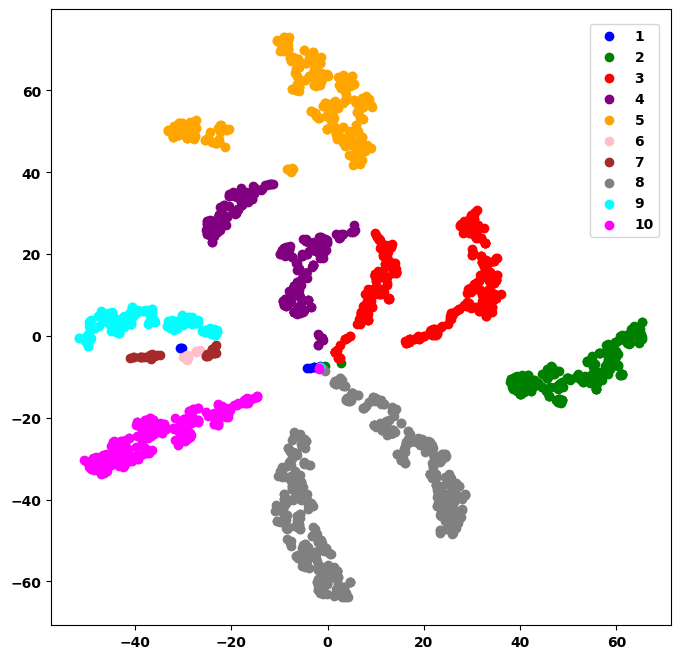

In [17]:
max_d=10
clusters = fcluster(Z, max_d, criterion='maxclust')
plt.figure(figsize=(8, 8))
color_names = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta']
for i in range(1, max_d+1):
    df_ = pd.DataFrame(columns = ['word', 'count'])
    df_['word'], df_['count'] = np.unique(train_X[clusters==i], return_counts=True)
    df_ = df_.sort_values(by=['count'], ascending=False)
    temp = []
    for word in df_.word.values[1:10]:
        if word != 0:
            temp.append(reverse_word_map[word])
    cluster_labels[i] = ' '.join(temp)
    plt.scatter(X_t[clusters==i,0], X_t[clusters==i,1], c = color_names[i-1], label = i)
    print(f'{color_names[i-1]} ({i}): {cluster_labels[i]}')
plt.legend(loc=(0.87, 0.63))
plt.show()

blue (1): density kernel plot var algorithm networks animation hash worldmap
green (2): plot graphical representation visualization data financial series time distribution
red (3): plot graphical representation visualization data financial simulation regression time
purple (4): plot graphical representation data visualization estimation financial series time
orange (5): data graphical visualization plot financial series time estimation
pink (6): plot clustering pareto similarity qq capm lob profile fractional
brown (7): distribution volatility stable estimation autoregressive regression markov density pdf
gray (8): plot graphical representation visualization financial distribution data time series
cyan (9): plot distribution financial estimation regression density quantile visualization kernel
magenta (10): plot visualization distribution graphical simulation representation regression time copula


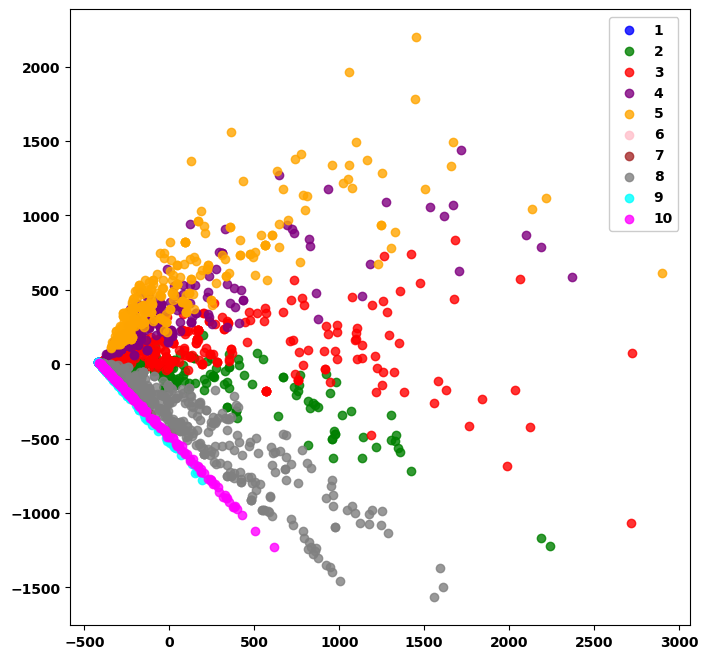

In [19]:
pca = PCA(n_components=2)
pca.fit(train_X)
X = pca.transform(train_X)

max_d=10
clusters = fcluster(Z, max_d, criterion='maxclust')
plt.figure(figsize=(8, 8))
color_names = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta']
for i in range(1, max_d+1):
    df_ = pd.DataFrame(columns = ['word', 'count'])
    df_['word'], df_['count'] = np.unique(train_X[clusters==i], return_counts=True)
    df_ = df_.sort_values(by=['count'], ascending=False)
    temp = []
    for word in df_.word.values[1:10]:
        if word != 0:
            temp.append(reverse_word_map[word])
    cluster_labels[i] = ' '.join(temp)
    plt.scatter(X[clusters==i,0], X[clusters==i,1], c = color_names[i-1], label = i, alpha = 0.8)
    print(f'{color_names[i-1]} ({i}): {cluster_labels[i]}')
plt.legend(loc=(0.87, 0.64), framealpha=1)
plt.show()